In [194]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [251]:
# Load datasets
total_crop_data = pd.read_csv("yield.csv")
rainfall_data = pd.read_csv('rainfall.csv')
temperature_data = pd.read_csv('temp.csv')
pesticides_data = pd.read_csv('pesticides.csv')


# Data Preprocessing and Merge Steps
1) **Preview and Check each dataset**
2) **Check for correct Data Types**	  -  Are columns stored as the correct type?	Enables correct grouping, merging, and math
3) **Check for Duplicates**           -  Are ther any duplicate rows?	Duplicay will result in bad merge. This will help avoiding skewed analysis
4) **Check for Column Names**	      -  Are names consistent and readable?	This helps with merging and plotting, I have done this earlier, just another check
5) **Check for Units & Formats**	  -  Are values in the same units?	This Ensures fair comparisons
6) **Check for Outliers**	          -  Any extreme values?	This will result skewed distribution. May distort averages or trends

Also I will check any **potential anomalies** like:

1. Data type mismatches (e.g., numeric columns stored as strings)
2. Unexpected values (e.g., negative rainfall, future years)
3. Date inconsistencies (e.g., invalid formats or out-of-range dates)
4. Categorical anomalies (e.g., unexpected region names or typos)


In [254]:
# Preview each dataset

print("Yield Data:")
print(total_crop_data.head(2))
print("\n",total_crop_data.describe())

Yield Data:
  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  

           Area Code  Element Code     Item Code     Year Code          Year  \
count  56717.000000       56717.0  56717.000000  56717.000000  56717.000000   
mean     125.650422        5419.0    111.611651   1989.669570   1989.669570   
std       75.120195           0.0    101.278435     16.133198     16.133198   
min        1.000000        5419.0     15.000000   1961.000000   1961.000000   
25%       58.000000        5419.0     56.000000   1976.000000   1976.000000   
50%      122.000000        5419.0    116.000000   1991.000000   1991.000000   
75%      184.000000        5419.0    125.000000   2004.000000  

In [256]:
# Preview each dataset
 
print("\nRainfall Data:")
print(rainfall_data.head(2))
print("\n",rainfall_data.describe())


Rainfall Data:
          Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327

               Year
count  6727.000000
mean   2001.354839
std       9.530114
min    1985.000000
25%    1993.000000
50%    2001.000000
75%    2010.000000
max    2017.000000


In [258]:
# Preview each dataset

print("\nTemperature Data:")
print(temperature_data.head(2))
print("\n",temperature_data.describe())


Temperature Data:
   year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52

                year      avg_temp
count  71311.000000  68764.000000
mean    1905.799007     16.183876
std       67.102099      7.592960
min     1743.000000    -14.350000
25%     1858.000000      9.750000
50%     1910.000000     16.140000
75%     1962.000000     23.762500
max     2013.000000     30.730000


In [260]:
# Preview each dataset

print("\nPesticides Data:")
print(pesticides_data.head(2))
print("\n",pesticides_data.describe())


Pesticides Data:
           Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  

               Year         Value
count  4349.000000  4.349000e+03
mean   2003.138883  2.030334e+04
std       7.728044  1.177362e+05
min    1990.000000  0.000000e+00
25%    1996.000000  9.300000e+01
50%    2003.000000  1.137560e+03
75%    2010.000000  7.869000e+03
max    2016.000000  1.807000e+06


**Drop unwanted columns**

In [263]:
total_crop_data = total_crop_data.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
total_crop_data.head(2)


,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000


In [265]:
pesticides_data = pesticides_data.drop(['Domain', 'Item', 'Element','Unit'], axis=1)
pesticides_data.head(2)

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0


***Standardize Column Names***

In [268]:
# Strip whitespace and lowercase column names
def unify_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df
# I prepared this function, so that in case in future I will use Fertilizer dataset I will just call this function - Reusability

total_crop_data = unify_columns(total_crop_data)
pesticides_data = unify_columns(pesticides_data)
rainfall_data = unify_columns(rainfall_data)
temperature_data = unify_columns(temperature_data)


**Rename Data for consistency**

In [271]:
total_crop_data.rename(columns={'value': 'yield'}, inplace=True) # Renaming the Value field to Yield
temperature_data.rename(columns={"country": "area"}, inplace=True) # Rename for consistency
pesticides_data.rename(columns={"value": "pesticides_tonnes"}, inplace=True)


**Check Data Types**

In [274]:
print("total_crop_data type\n", total_crop_data.dtypes)
print("temperature_data\n",temperature_data.dtypes)
print("pesticides_data\n",pesticides_data.dtypes)
print("rainfall_data\n",rainfall_data.dtypes)

total_crop_data type
 area     object
item     object
year      int64
yield     int64
dtype: object
temperature_data
 year          int64
area         object
avg_temp    float64
dtype: object
pesticides_data
 area                  object
year                   int64
pesticides_tonnes    float64
dtype: object
rainfall_data
 area                             object
year                              int64
average_rain_fall_mm_per_year    object
dtype: object


**Fix Data Type**

In [277]:
#average_rain_fall_mm_per_year is object type need to change it to numeric/float

rainfall_data['average_rain_fall_mm_per_year'] = pd.to_numeric(
    rainfall_data['average_rain_fall_mm_per_year'], errors='coerce'
)
print(rainfall_data.dtypes)

area                              object
year                               int64
average_rain_fall_mm_per_year    float64
dtype: object


**3. Check Year Data range**

In [280]:
for df, name in [(total_crop_data, "Crop"), (rainfall_data, "Rainfall"),
                 (temperature_data, "Temperature"), (pesticides_data, "Pesticides")]:
    print(f"{name} year range: {df['year'].min()} to {df['year'].max()}")

Crop year range: 1961 to 2016
Rainfall year range: 1985 to 2017
Temperature year range: 1743 to 2013
Pesticides year range: 1990 to 2016


**Fix 'Year' Data range - starts from 1961**

In [283]:
#Temperature data for year 1743 is not needed in our scope of crop data avialable, which starts from 1961, 
#so dropping rows year value of less than this.

#print((temperature_data[temperature_data['year'] < 1961]).count())  #53026 rows
temperature_data = temperature_data[temperature_data['year'] >= 1961]  # To align with crop data,yield file - year
print("temperature_data count ",temperature_data.count()) #count	71311.000000 - 53026 = 18285


temperature_data count  year        18285
area        18285
avg_temp    18285
dtype: int64


In [285]:
#total_crop_data = total_crop_data[total_crop_data['yield'] > 0]
#total_crop_data.describe()

# Check Duplicates and drop the extra rows

In [292]:
print("Total_crop_data Duplicates:", total_crop_data.duplicated(subset=['area', 'item', 'year']).sum())

print("Pesticides_data Duplicates:", pesticides_data.duplicated(subset=['area', 'year']).sum())

print("Rainfall_data Duplicates:", rainfall_data.duplicated(subset=['area', 'year']).sum())

print("Temperature_data Duplicates:", temperature_data.duplicated(subset=['area', 'year']).sum())

Total_crop_data Duplicates: 0
Pesticides_data Duplicates: 0
Rainfall_data Duplicates: 0
Temperature_data Duplicates: 11024


In [294]:
#drop_duplicates

In [296]:
temperature_data = temperature_data.drop_duplicates(subset=['area', 'year'], keep='last')

In [298]:
print("Remaining Duplicates:", temperature_data.duplicated(subset=['area', 'year']).sum())
print("Temperature_data count",temperature_data.count())

Remaining Duplicates: 0
Temperature_data count year        7261
area        7261
avg_temp    7261
dtype: int64


# Checking for Missing values

In [301]:
for df, name in [(total_crop_data, "Crop"), (rainfall_data, "Rainfall"),
                 (temperature_data, "Temperature"), (pesticides_data, "Pesticides")]:
    print(f"\n{name} Missing Values:")
    print(df.isnull().sum())


Crop Missing Values:
area     0
item     0
year     0
yield    0
dtype: int64

Rainfall Missing Values:
area                               0
year                               0
average_rain_fall_mm_per_year    780
dtype: int64

Temperature Missing Values:
year        0
area        0
avg_temp    0
dtype: int64

Pesticides Missing Values:
area                 0
year                 0
pesticides_tonnes    0
dtype: int64


# **Handling Missing Values**

Choose from **Drop, Impute, or Bootstrap**

# Comparision of Mean Median and Bootsrtapping method


In [314]:

data = rainfall_data[['average_rain_fall_mm_per_year']].copy()
data.rename(columns={'average_rain_fall_mm_per_year': 'Rainfall'}, inplace=True)

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
data['Mean_Imputed'] = mean_imputer.fit_transform(data[['Rainfall']])

# Median imputation
median_imputer = SimpleImputer(strategy='median')
data['Median_Imputed'] = median_imputer.fit_transform(data[['Rainfall']])

# Bootstrap imputation: sample with replacement from non-missing values
bootstrap_values = data['Rainfall'].dropna().sample(n=data['Rainfall'].isna().sum(), replace=True).values
bootstrap_imputed = data['Rainfall'].copy()
bootstrap_imputed[data['Rainfall'].isna()] = bootstrap_values
data['Bootstrap_Imputed'] = bootstrap_imputed



<Figure size 1200x600 with 0 Axes>

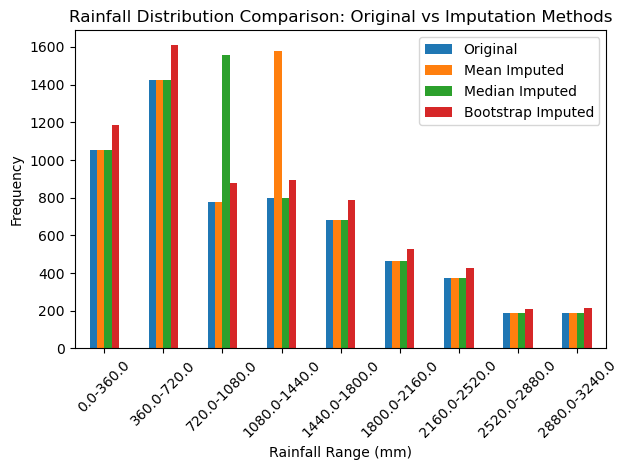

In [316]:

plot_df = pd.DataFrame({
    'Original': data['Rainfall'],
    'Mean Imputed': data['Mean_Imputed'],
    'Median Imputed': data['Median_Imputed'],
    'Bootstrap Imputed': data['Bootstrap_Imputed']
})

# Define bins for grouping rainfall values
bins = np.linspace(0, plot_df.max().max(), 10)
labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]

# Count values in each bin for each method
binned_df = pd.DataFrame()
for col in plot_df.columns:
    binned = pd.cut(plot_df[col], bins=bins, labels=labels, include_lowest=True)
    binned_df[col] = binned.value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
binned_df.plot(kind='bar')
plt.title('Rainfall Distribution Comparison: Original vs Imputation Methods')
plt.xlabel('Rainfall Range (mm)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()



# Chosing Bootstrap Imputation

Unlike mean or median imputation, which can flatten variability, bootstrap keeps the natural spread and shape of the data
It avoids Bias. So I will chose Bootstrapped data as my final data before merging.

# Apply bootstrap imputation to missing rows only

In [331]:

rainfall_data.loc[rainfall_data['average_rain_fall_mm_per_year'].isna(), 'average_rain_fall_mm_per_year'] = data['Bootstrap_Imputed']
print("Null values or Missing values:\n",rainfall_data.isnull().sum())
rainfall_data.shape


Null values or Missing values:
 area                             0
year                             0
average_rain_fall_mm_per_year    0
dtype: int64


(6727, 3)

#  Check for Outliers

In [335]:

def visualize_outliers(df, column, title):
  
    # Calculate IQR and identify outliers
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    print(f"{title}: {len(outliers)} outliers")
    print(f"\n{title}: {outliers} outliers")
    return lower, upper, outliers


In [337]:

lower, upper, outliers = visualize_outliers(rainfall_data, 'average_rain_fall_mm_per_year', 'Rainfall (mm/year)')


Rainfall (mm/year): 0 outliers

Rainfall (mm/year): Series([], Name: average_rain_fall_mm_per_year, dtype: float64) outliers


In [339]:

lower, upper, outliers = visualize_outliers(temperature_data, 'avg_temp', 'Temperature (°C)')


Temperature (°C): 0 outliers

Temperature (°C): Series([], Name: avg_temp, dtype: float64) outliers


In [341]:

lower, upper, outliers = visualize_outliers(pesticides_data, 'pesticides_tonnes', 'Pesticides Usage (tonnes)')


Pesticides Usage (tonnes): 22 outliers

Pesticides Usage (tonnes): 890    1087044.0
891    1140812.0
892    1195466.0
893    1231699.0
894    1321620.0
895    1279533.0
896    1274820.0
897    1312285.0
898    1325226.0
899    1386028.0
900    1460000.0
901    1537000.0
902    1623000.0
903    1672300.0
904    1709000.0
905    1758000.0
906    1787002.0
907    1806000.0
908    1801862.0
909    1807000.0
910    1763000.0
911    1763000.0
Name: pesticides_tonnes, dtype: float64 outliers


#These data of Pesticides with 22 extreme data, doesn't look like true outliers, so I am going to keep these in the database.

In [344]:
lower, upper, outliers = visualize_outliers(total_crop_data, 'yield', 'Crop Yield (tonnes)')


Crop Yield (tonnes): 1 outliers

Crop Yield (tonnes): 27930    1000000
Name: yield, dtype: int64 outliers


Rainfall (mm/year): 0 outliers
Temperature (°C): 0 outliers
Pesticides Usage (tonnes): **22 outliers - no action**
Crop Yield (tonnes): ***1 outliers - True outlier***


Crop Yield (tonnes): 1 outliers

Crop Yield (tonnes): 27930    1000000
Name: yield, dtype: int64 outliers


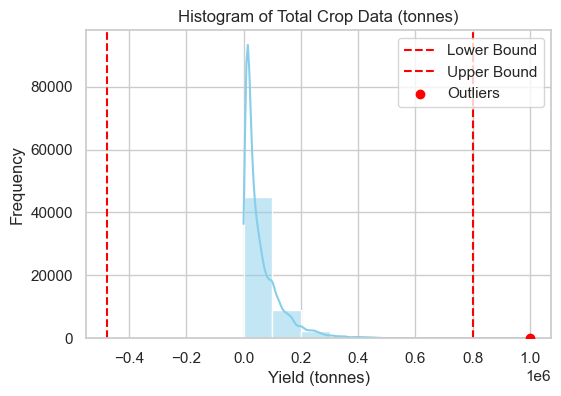

In [347]:
lower_bound, upper_bound, outliers = visualize_outliers(total_crop_data, 'yield', 'Crop Yield (tonnes)')

#print(outliers)

sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(6,4))
sns.histplot(total_crop_data['yield'], bins=10, kde=True, color="skyblue")
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.scatter(outliers, [0.01]*len(outliers), color='red', label='Outliers', zorder=5)
plt.title('Histogram of Total Crop Data (tonnes)')
plt.xlabel('Yield (tonnes)')
plt.ylabel('Frequency')
plt.legend()
plt.show() 


**Drop this outlier from the Crop Yield dataset**

In [1644]:
# Remove rows where 'yield' equals 1000000
# Remove rows using index from the outliers DataFrame
total_crop_data = total_crop_data.drop(outliers.index)

In [1647]:
lower, upper, outliers = visualize_outliers(total_crop_data, 'yield', 'Crop Yield (tonnes)')

Crop Yield (tonnes): 0 outliers

Crop Yield (tonnes): Series([], Name: yield, dtype: int64) outliers


# Aggregate Data by Area and Year


In [350]:
# Aggregate rainfall data by Area and Year
aggregated_rainfall_data = rainfall_data.groupby(['area', 'year'], as_index=False).agg({
    'average_rain_fall_mm_per_year': 'mean'
})
print("\nAggregated Rainfall Data Info:")
aggregated_rainfall_data.info()

# Aggregate temperature data by Area and Year
aggregated_temperature_data = temperature_data.groupby(['area', 'year'], as_index=False).agg({
    'avg_temp': 'mean'
})
print("\nAggregated temperature Data Info:")
aggregated_temperature_data.info()

# Aggregate pesticides data by Area and Year
aggregated_pesticides_data = pesticides_data.groupby(['area', 'year'], as_index=False).agg({'pesticides_tonnes': 'mean'})
print("\nAggregated Pesticides Data Info:")
aggregated_pesticides_data.info()

    


Aggregated Rainfall Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area                           6727 non-null   object 
 1   year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  6727 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB

Aggregated temperature Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7261 entries, 0 to 7260
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      7261 non-null   object 
 1   year      7261 non-null   int64  
 2   avg_temp  7261 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 170.3+ KB

Aggregated Pesticides Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 

# MERGE DATA

In [352]:
total_crop_data.describe()

,year,yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [354]:
total_crop_data.count()


area     56717
item     56717
year     56717
yield    56717
dtype: int64

In [356]:
aggregated_temperature_data.count()

area        7261
year        7261
avg_temp    7261
dtype: int64

In [358]:
aggregated_pesticides_data.count()


area                 4349
year                 4349
pesticides_tonnes    4349
dtype: int64

In [360]:
aggregated_rainfall_data.describe()

,year,average_rain_fall_mm_per_year
count,6727.000000,6727.000000
mean,2001.354839,1128.217630
std,9.530114,787.300471
min,1985.000000,51.000000
25%,1993.000000,536.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [366]:

Merged_crop_data = total_crop_data.merge(aggregated_rainfall_data[["area", "year","average_rain_fall_mm_per_year"]], on=["area", "year"])
Merged_crop_data = Merged_crop_data.merge(aggregated_temperature_data, on=["area", "year"])
Merged_crop_data = Merged_crop_data.merge(aggregated_pesticides_data[["area", "year", "pesticides_tonnes"]], on=["area", "year"])

# Preview merged data
print(Merged_crop_data.head(2))
Merged_crop_data.describe()


      area   item  year  yield  average_rain_fall_mm_per_year  avg_temp  \
0  Albania  Maize  1990  36613                         1485.0     16.37   
1  Albania  Maize  1991  29068                         1485.0     15.36   

   pesticides_tonnes  
0              121.0  
1              121.0  


,year,yield,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
count,13136.000000,13136.000000,13136.000000,13136.000000,13136.000000
mean,2001.617692,70959.634440,1157.599269,19.860883,14832.141503
std,7.035556,79111.427638,743.693891,6.740556,33646.165696
min,1990.000000,50.000000,51.000000,1.300000,0.040000
25%,1995.000000,18000.000000,608.000000,16.040000,264.582500
50%,2001.000000,39536.000000,1083.000000,20.870000,2170.400000
75%,2008.000000,97159.000000,1651.000000,25.850000,13335.220000
max,2013.000000,501412.000000,3240.000000,30.650000,367778.000000


# Save the Final Merged Dataset!!!

In [383]:
Merged_crop_data.to_csv('final_crop_yield_data.csv', index=False) 

In [377]:
Merged_crop_data.to_pickle('final_crop_yield_data.pkl')

# Foot Note

**It took me long time and lots of efort to clean this data, because I have used...**
**Bootstrapping, Outlier detection and aggregation and other techniques like dropping years below 1961 so my datasize has reduced to 13136**
**Lean and Smart Data**